# Pre-Processing Techniques

## Imports

In [100]:
# CONSTANT Variables
files = ['Data/Plasma/ADNI_BLENNOWPLASMANFLLONG_10_03_18_12Feb2024.csv', 'Data/Plasma/UGOTPTAU181_06_18_20_27Nov2023.csv', 'Data/Plasma/UPENNMSMSABETA2_12Feb2024.csv']

fields_needed = ['RID', 'VISCODE2', 'PLASMA_NFL', 'PLASMAPTAU181', 'ABETA42', 'ABETA40'] # Fields needed after the merge
# This is the AB value names that can be used
abvals = ['ABETA42', 'ABETA40']

display1 = ['PLASMA_NFL', 'PLASMAPTAU181', 'AB4240'] # These should be the biomarker values
display2 = ['ABETA', 'PTAU', 'TAU'] # Should be the CSF Values
display3 = ['MMSE', 'PTEDUCAT', 'AGE'] # This should be the Non-Blood values, such as MMSE etc.
all_display = ['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMAPTAU181', 'AB4240', 'ABETA', 'PTAU', 'TAU', 'MMSE', 'PTEDUCAT', 'AGE', 'PTGENDER']


output_file_path = "File2/"

In [101]:
#TODO: Deal with NULL values
%reload_ext autoreload
%autoreload 2
import pandas as pd
from PreProcessingPy import pp


## Read the Relevant Dataframes and Merge

In [102]:
# Read the dfs
preprocessor = pp(files, ['RID', 'VISCODE2'], fields_needed)
preprocessor.df.drop_duplicates(subset=['RID', 'VISCODE2'], inplace=True)

# Create the AB42/AB40 value
preprocessor.create_ab4240(abvals)
preprocessor.df


,RID,VISCODE2,PLASMA_NFL,PLASMAPTAU181,AB4240
0,2,m60,25.3,11.939,NaN
1,2,m72,30.9,12.936,NaN
2,2,m84,34.1,13.563,NaN
3,2,m96,35.3,15.506,NaN
4,8,m60,196.3,18.305,NaN
...,...,...,...,...,...
3863,5294,bl,21.2,7.085,NaN
3864,5295,bl,16.4,10.932,0.144890
3865,5295,m24,14.1,9.335,NaN
3866,5296,bl,21.4,4.045,0.160068


In [103]:
preprocessor.df.rename(columns={"VISCODE2":"VISCODE"}, inplace=True) # Data in the class is based on VISCODE
preprocessor.add_adni_merge_data(all_display)
preprocessor.df

d:\Git\NoMoreAlzheimersDisease\PreProcessingFiles\PreProcessingPy.py:58: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  am = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMAPTAU181,AB4240,ABETA,PTAU,TAU,MMSE,PTEDUCAT,AGE,PTGENDER
0,2,m60,CN,25.3,11.939,NaN,NaN,NaN,NaN,28.0,16,74.3,Male
1,2,m72,CN,30.9,12.936,NaN,NaN,NaN,NaN,23.0,16,74.3,Male
2,2,m84,MCI,34.1,13.563,NaN,NaN,NaN,NaN,24.0,16,74.3,Male
3,2,m96,CN,35.3,15.506,NaN,NaN,NaN,NaN,25.0,16,74.3,Male
4,8,m60,CN,196.3,18.305,NaN,NaN,NaN,NaN,28.0,18,84.5,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,5294,bl,CN,21.2,7.085,NaN,NaN,NaN,NaN,30.0,18,68.5,Male
3691,5295,bl,CN,16.4,10.932,0.144890,416.8,8.53,88.69,29.0,15,75.5,Female
3692,5295,m24,CN,14.1,9.335,NaN,NaN,NaN,NaN,26.0,15,75.5,Female
3693,5296,bl,CN,21.4,4.045,0.160068,1460,20.9,224.9,29.0,14,69.3,Male


## Rename Fields

In [104]:
# Rename to be more intuitive for rest of detection
preprocessor.clean_data()
preprocessor.df

,RID,VISCODE,DX,PLASMA_NFL,PLASMAPTAU181,AB4240,ABETA,PTAU,TAU,MMSE,PTEDUCAT,AGE,PTGENDER
0,2,m60,SCD,25.3,11.939,NaN,NaN,NaN,NaN,28.0,16,74.3,0
1,2,m72,SCD,30.9,12.936,NaN,NaN,NaN,NaN,23.0,16,74.3,0
2,2,m84,MCI,34.1,13.563,NaN,NaN,NaN,NaN,24.0,16,74.3,0
3,2,m96,SCD,35.3,15.506,NaN,NaN,NaN,NaN,25.0,16,74.3,0
4,8,m60,SCD,196.3,18.305,NaN,NaN,NaN,NaN,28.0,18,84.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,5294,bl,SCD,21.2,7.085,NaN,NaN,NaN,NaN,30.0,18,68.5,0
3691,5295,bl,SCD,16.4,10.932,0.144890,416.8,8.53,88.69,29.0,15,75.5,1
3692,5295,m24,SCD,14.1,9.335,NaN,NaN,NaN,NaN,26.0,15,75.5,1
3693,5296,bl,SCD,21.4,4.045,0.160068,1460,20.9,224.9,29.0,14,69.3,0


## Plot the data

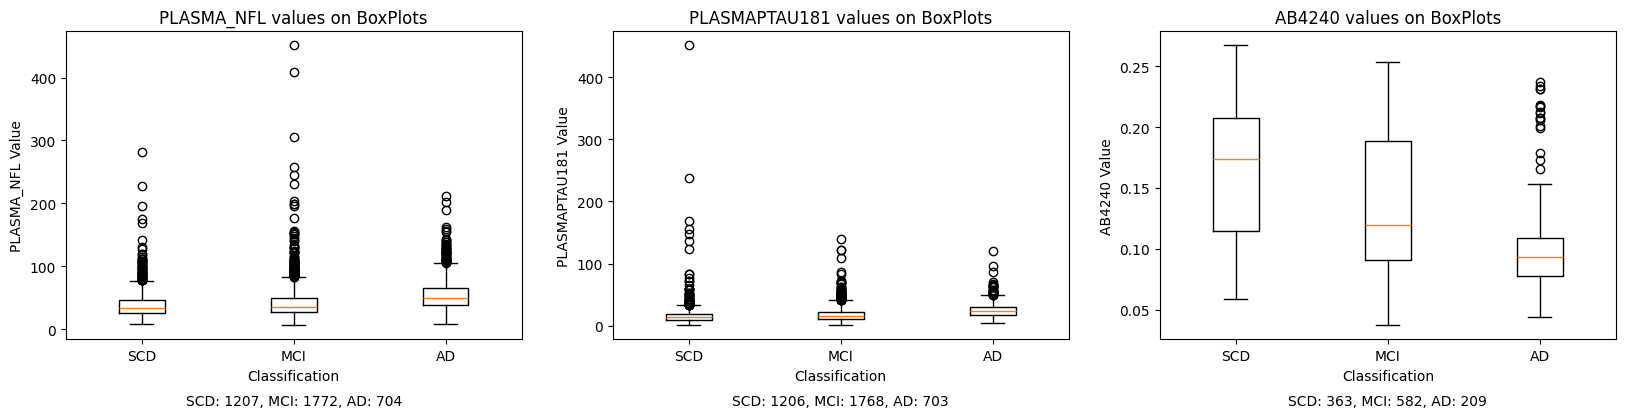

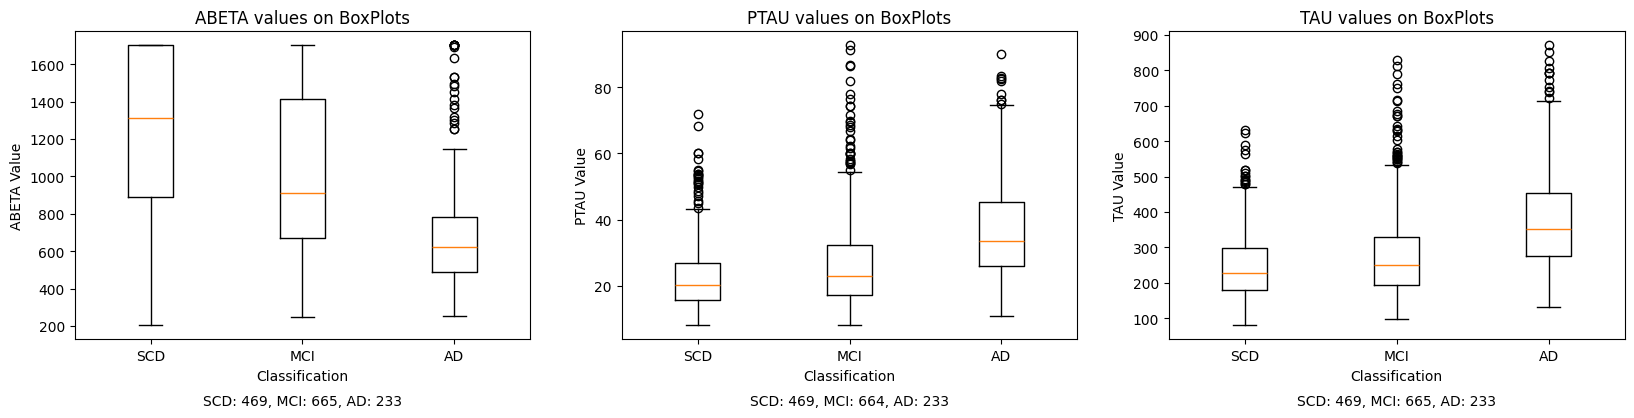

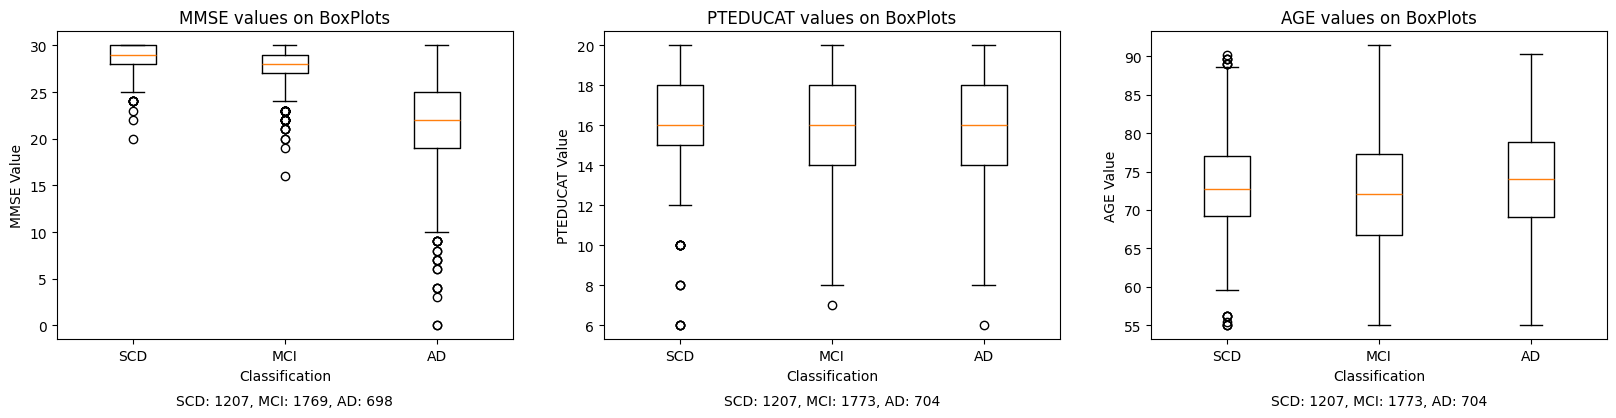

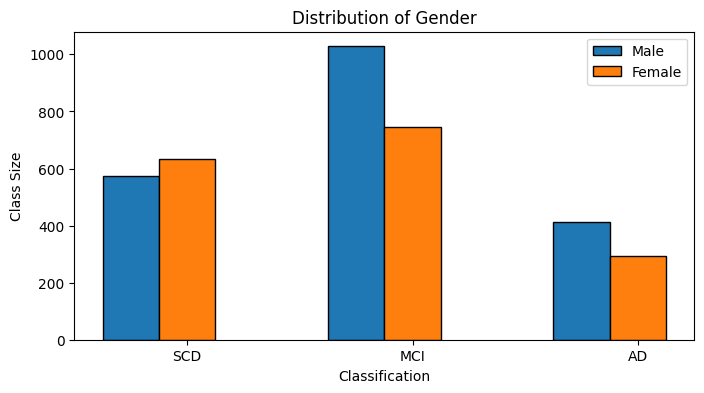

In [105]:
from PreProcessingPy import visual_display
vd = visual_display(preprocessor.df)

vd.display(display1)
vd.display(display2)
vd.display(display3)
vd.display_gender()

In [106]:
# Write this to the Data file
preprocessor.write_to_csv(output_file_path + '/UnCleanData/data.csv')

## Identify Outliers

In [107]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

preprocessor.remove_outliers(display1)
preprocessor.remove_outliers(display2)
preprocessor.remove_outliers(display3)

[513, 514, 515, 4, 5, 1540, 1543, 1541, 1542, 523, 13, 528, 530, 1558, 3615, 3630, 52, 53, 3637, 55, 1604, 2629, 71, 73, 2132, 2133, 2136, 3687, 106, 108, 110, 638, 2178, 644, 652, 144, 145, 146, 148, 666, 2216, 1717, 1718, 1719, 1720, 2237, 205, 206, 207, 2767, 221, 2783, 1769, 1770, 1771, 3318, 2298, 262, 2827, 2829, 2319, 2322, 2835, 1811, 1812, 288, 800, 801, 2369, 323, 324, 325, 326, 837, 883, 885, 886, 3458, 390, 391, 392, 2447, 929, 422, 1965, 2482, 2995, 3513, 3526, 2509, 2510, 3534, 2512, 2513, 2515, 2516, 478, 479, 480, 481, 3551, 486, 504]
[2460, 2462, 2463, 3620, 2230, 2232, 2233, 2368, 3655, 2130, 3686, 1768, 745, 747, 2667, 1901, 3581, 3582, 2559]
[640, 1, 641, 642, 1557, 3616, 2210, 2212, 2213, 3128, 835, 836, 1221, 2125, 3664, 3665, 3666, 3541, 3671, 215, 217, 218, 216, 476, 483, 484, 485, 1516, 1518, 251, 639]


### Display the Filtered Data

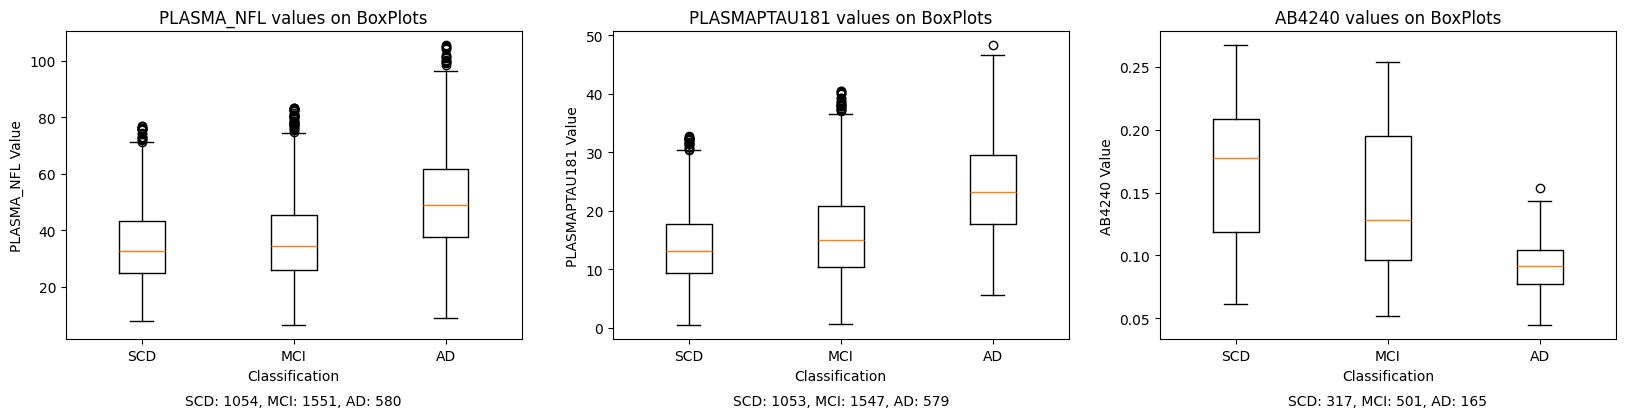

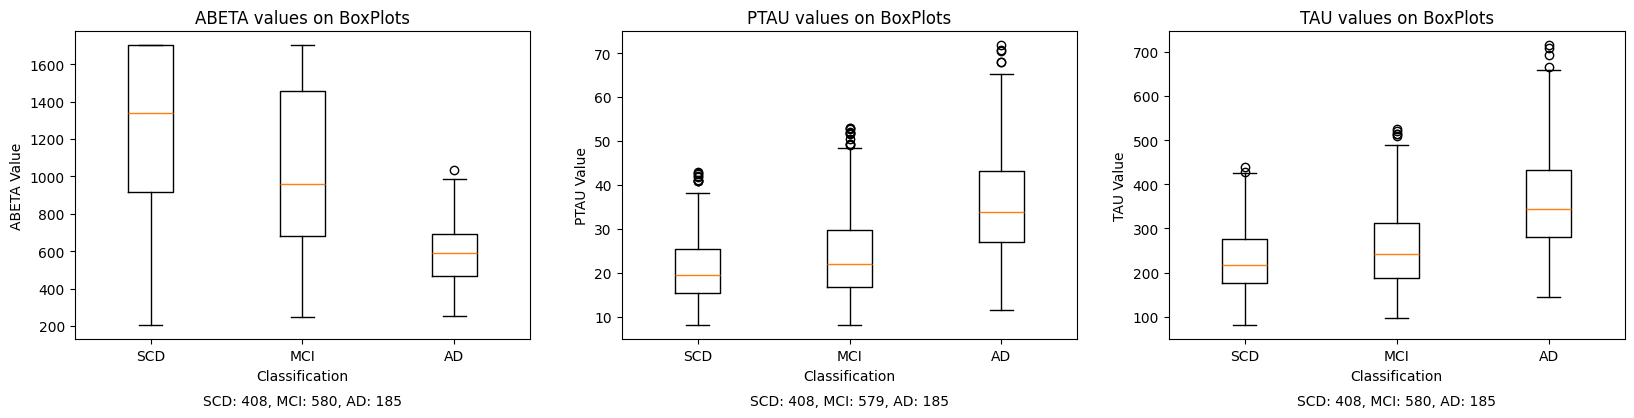

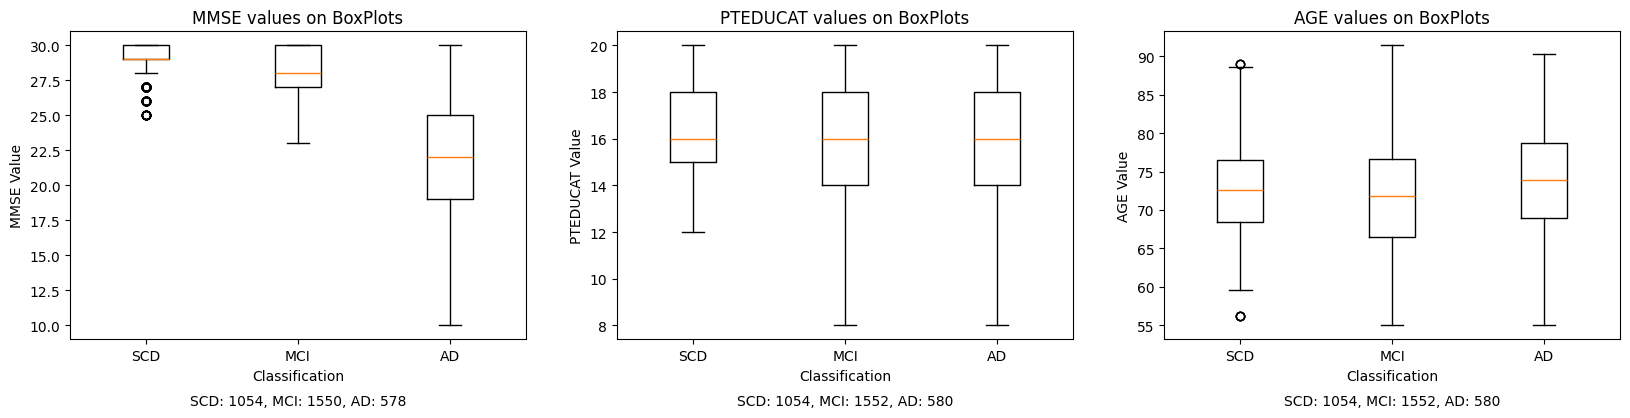

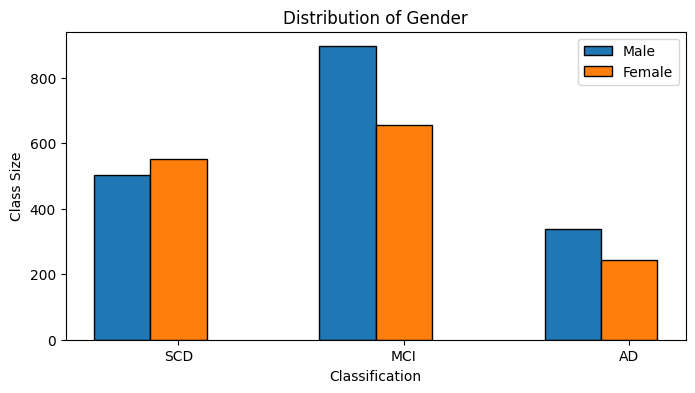

In [108]:
vd = visual_display(preprocessor.df)
vd.display(display1)
vd.display(display2)
vd.display(display3)
vd.display_gender()

In [109]:
# Write this to a data file (with the outliers removed)
preprocessor.write_to_csv(output_file_path + 'CleanedData/data.csv')

## Effects of Pre-Processing in terms of Class Sizes

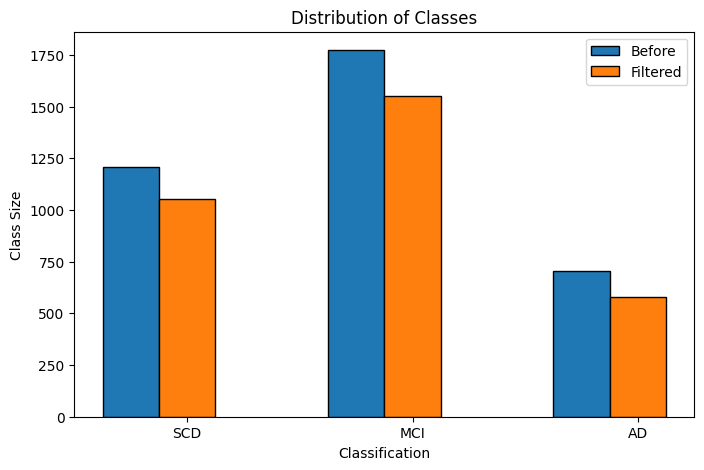

In [110]:
from PreProcessingPy import post_processing_display
# Compare Sizes of the data throughout processing
display = post_processing_display("File2")
display.display_results()

## Volume of Data 